<a href="https://colab.research.google.com/github/Japanesepokerlover/prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

昨今twitterで話題の肌色バンの対策をサポートするプログラムです。

（肌色バンとは、肌色の面積が大きい画像を投稿すると他の人に表示させにくくされる一種のバンのことです）

twitterに画像をアップロードする前にこのプログラムに通すことで、そのリスクを回避しやすくなります。

In [4]:
#ライブラリ import
import numpy as np
import cv2,sys
from google.colab.patches import cv2_imshow
import re
import os

In [2]:
#サンプル画像のURL
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2023-01-19 05:53:59--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.113, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tmt8gkic8v83cc1bpdjcl8mfssvqcek3/1674107625000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=a96e8eae-c835-497d-a844-bdf7c6a35d16 [following]
--2023-01-19 05:53:59--  https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tmt8gkic8v83cc1bpdjcl8mfssvqcek3/1674107625000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=a96e8eae-c835-497d-a844-bdf7c6a35d16
Resolving doc-04-0o-docs.googleusercontent.com (doc-04-0o-docs.googleusercontent.com)... 74.125.197.132, 2607:

緑の割合が大きすぎます


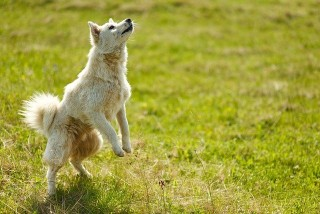

22737
68480


In [10]:
#サンプルコード
#ここでは犬の画像に対し緑色の面積が大きいか判別し警告させるものとします

# 画像ファイルを読み込み
img = cv2.imread('dog.jpg')
if img is None:
  sys.exit('エラー: ファイルを開けませんでした')

# RGB成分の初期化
green_r = 0
green_g = 0
green_b = 0

#画像の幅と高さから画素数を計算します
h = img.shape[0]  # 画像の高さ
w = img.shape[1]  # 画像の幅
pixels = h*w #画像の画素数

#緑であった画素の個数を記録する変数
green = 0
#それぞれの画素について違反するか確かめ、違反数を記録する
for iy in range(h):
    for ix in range(w):
      green_b = img[iy,ix][0]
      green_g = img[iy,ix][1]
      green_r = img[iy,ix][2]
      #ここでの緑の定義は、RGBのうち、greenが80以上かつ、redとblueがともにgreen未満かつ、いずれかがgreenの半分以下とする
      #この定義を変えそれにあった条件式にすることで緑のみならず様々な色の判定をすることができる
      if green_g >= 80 and green_g > green_b and green_g > green_r:
        if green_g >= 2*green_b or green_g >= 2*green_r:
          green+=1

#警告を出す割合をNで定義する（0～1）
N = 0.3

#緑の割合がNに達しているかどうかで判定し、画像とその結果を表示する
green_ratio = green/pixels #緑の割合

if green_ratio >= N :
  print('緑の割合が大きすぎます')
else:
  print('緑の割合は問題ありません')

#画像の表示
cv2_imshow(img)





In [ ]:
#実際に使用する場合はこちらから
#ファイルを読み込むコード

#キーボードからの入力よりファイルのurlを取得する
FILE_URL : str = input('google drive上のファイルのURLを入力してください.なおファイルの形式はjpgにしてください.:')

# ファイルパスから、ファイルのidを取得する
def get_file_id(filepath: str) -> str:
    if not re.match("https://drive.google.com/", filepath):
        # filepathがgoogle driveのURLではない場合は、例外を発生させる
        raise ValueError("urlに誤りがあります。")

    # split後、6番目の配列にIDが格納されている
    file_id_index = 5
    return filepath.split("/")[file_id_index]
#ファイルのダウンロードに使うコードを作成
file_url_id = "https://drive.google.com/uc?export=download&id=" + get_file_id(FILE_URL)
#osを使用して実行
com = '"' + file_url_id + '"' + " -O image.jpg"
print(com)
os.system("wget " + com)

肌色の割合は問題ありません


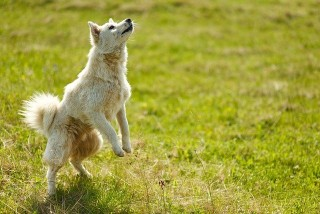

In [11]:
#メインコード
# 画像ファイルを読み込み
img = cv2.imread('image.jpg')
if img is None:
  sys.exit('エラー: ファイルを開けませんでした')

# RGB成分の初期化
flesh_r = 0
flesh_g = 0
flesh_b = 0

#画像の幅と高さから画素数を計算します
h = img.shape[0]  # 画像の高さ
w = img.shape[1]  # 画像の幅
pixels = h*w #画像の画素数

#肌色であった画素の個数を記録する変数
flesh = 0
#それぞれの画素について違反するか確かめ、違反数を記録する
for iy in range(h):
    for ix in range(w):
      flesh_b = img[iy,ix][0]
      flesh_g = img[iy,ix][1]
      flesh_r = img[iy,ix][2]
      #ここでの肌色の定義は、RGBの各数字がredが241の±20,blueが147の±10,greenが187の±187とする
      #この定義を変えそれにあった条件式にすることで肌色のみならず様々な色の判定をすることができる
      if abs(flesh_g-187) <= 15 and abs(flesh_b-147) <= 10 and abs(flesh_r-241) <= 20:
        flesh += 1

#警告を出す割合をNで定義する（0～1）
N = 0.3

#緑の割合がNに達しているかどうかで判定し、画像とその結果を表示する
flesh_ratio = flesh/pixels #肌色の割合

if flesh_ratio >= N :
  print('肌色の割合が大きすぎます')
else:
  print('肌色の割合は問題ありません')

#画像の表示
cv2_imshow(img)
